#Classify Customers : client’s cases in terms of whether he will subscribe to a deposit or not based on his /her information

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline 

In [3]:
import seaborn as sns
sns.set(color_codes = True)

# Reading Data and get some information about data

In [5]:
#read Data
dataset = pd.read_csv('/content/drive/MyDrive/bank.csv', sep = ';')

In [6]:
dataset.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [7]:
#shape of data and columns name
print("Shape of the data:",dataset.shape)
print("Columns Names are:\n",dataset.columns)

Shape of the data: (4521, 17)
Columns Names are:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


# Our data include 4521 entries and  17 columns

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


#show columns that have numeric values

In [9]:
numeric_data = dataset.select_dtypes(include = np.number)
numeric_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [10]:
numeric_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

#show columns that have categorical data

In [11]:
categorical_data = dataset.select_dtypes(exclude = np.number)
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


#check if our data have missing vaues

In [12]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#Analysis Data 

* As count plot shows that the may month has the most value

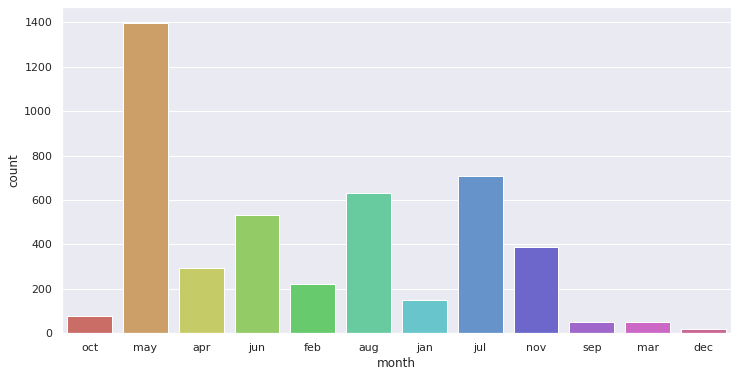

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x= dataset['month'], data= dataset, palette= 'hls')
plt.show()

*  As line plot shows how balance spread over day

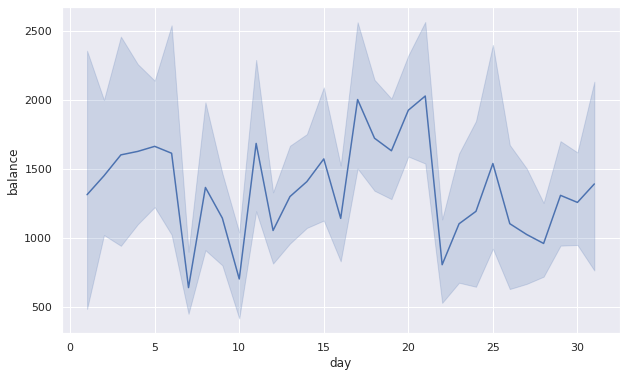

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

sns.lineplot(x=dataset['day'], y=dataset['balance'])

*  As count plot shows that the secondary has the most value

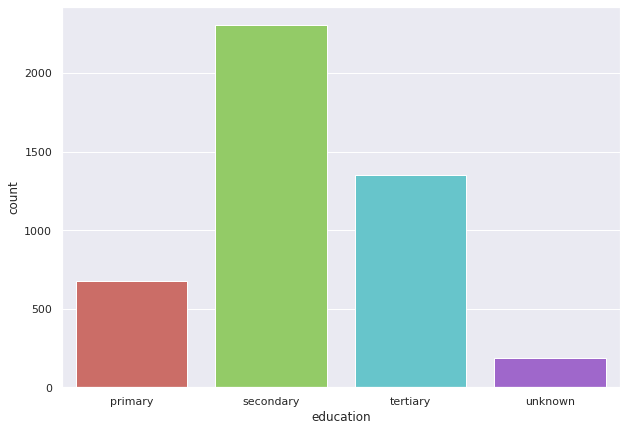

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x= dataset['education'], data= dataset, palette= 'hls')
plt.show()

*  As count plot shows that the managment job has the most count

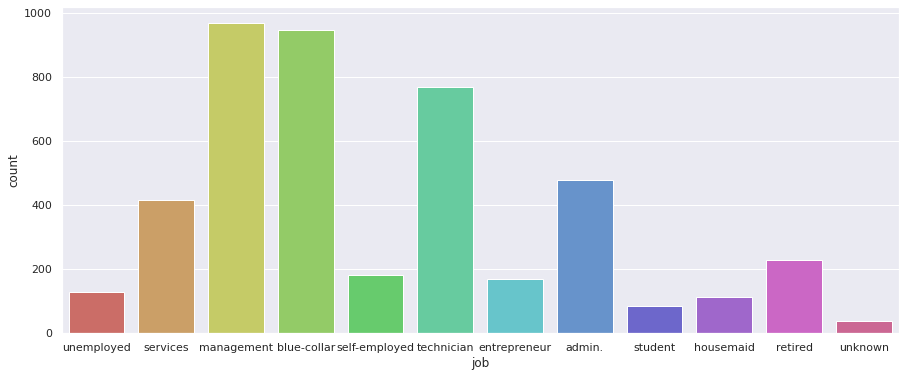

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x= dataset['job'], data= dataset, palette= 'hls')
plt.show()

*  As count plot shows that the married (marital) has the most count

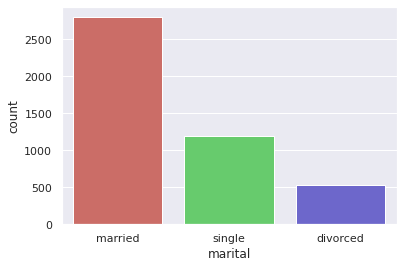

In [17]:

sns.countplot(x= dataset['marital'], data= dataset, palette= 'hls')
plt.show()

* show count for each type: 
* no     88.476001
* yes    11.523999

In [18]:
#Check Balance
class_values = (dataset['y'].value_counts()/dataset['y'].value_counts().sum())*100
class_values

no     88.476001
yes    11.523999
Name: y, dtype: float64

#Data Processing

* we apply LabelEncoder method in categorical variables to be numeric

In [19]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
cat_var=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']
for i in cat_var:
    dataset[i]=LE.fit_transform(dataset[i])
    
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


#Split data : 
* x :  all columns (independent variables)
* y :  dependent variable (yes, No)

In [20]:
X=dataset.iloc[:,0:16]
y=dataset.iloc[:,-1:]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# apply scaling method in data to make learning process more easy

In [22]:
sc=StandardScaler()
sc.fit_transform(X)

array([[-1.05626965,  1.71680374, -0.24642938, ..., -0.4072183 ,
        -0.32041282,  0.44441328],
       [-0.77258281,  0.79524562, -0.24642938, ...,  2.98904408,
         2.04173372, -2.57996071],
       [-0.58345826, -0.12631251,  1.42139579, ...,  2.89914302,
         0.27012381, -2.57996071],
       ...,
       [ 1.49691189,  1.4096177 , -0.24642938, ..., -0.4072183 ,
        -0.32041282,  0.44441328],
       [-1.24539421, -1.04787063, -0.24642938, ...,  1.71045119,
         1.45119709, -1.57183605],
       [ 0.26760226, -0.74068459,  1.42139579, ...,  2.09003345,
         3.81334363, -1.57183605]])

#split data : train , test

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [24]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4256,34,3,1,0,0,2929,0,0,0,14,1,518,2,-1,0,3
86,41,9,2,1,0,879,0,1,0,7,5,60,4,-1,0,3
4037,42,4,0,2,0,0,0,0,2,19,8,131,2,-1,0,3
1367,40,9,1,1,0,169,1,0,0,18,1,43,4,-1,0,3
1015,43,5,1,1,0,520,1,0,2,20,8,15,13,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,29,1,1,1,0,228,1,0,0,11,8,12,8,342,9,0
1099,58,3,1,0,0,5278,1,0,2,4,6,763,4,-1,0,3
2514,31,9,2,3,0,694,1,0,2,6,6,431,2,-1,0,3
3606,29,7,1,1,0,308,1,0,2,28,8,75,1,-1,0,3


In [25]:
y_train

,y
4256,1
86,0
4037,0
1367,0
1015,0
...,...
3335,0
1099,0
2514,0
3606,0


#Next Step: Buillding model and evaluate 
The model is logistic regression